# Introdução

Este capítulo pretende introduzir o leitor à programação em Mathematica. Vamos assumir que o leitor está vagamente familiarizado com os conceitos de programação.

O Mathematica é extremamente poderoso por causa do seu sistema de programação simbólica, que vamos explorar mais tarde. Para além disso, o Mathematica tem, no momento em que este parágrafo foi escrito, [quase 6000 funções pré-definidas](https://reference.wolfram.com/language/guide/AlphabeticalListing).

No entanto, vamos começar por introduzir o Mathematica como uma linguagem de programação "clássica".

## Objetivos

Os objetivos deste capítulo são

 - apresentar a sintaxe básica para chamar funções no Mathematica;
 - mostrar como encadear várias instruções consecutivas;
 - mostrar que tudo no Mathematica são funções;
 - usar as funções `If`, `For` e `While` para execução condicional e/ou repetida de código;
 - aprender a usar `Module` para impedir que a sessão fique cheia de variáveis inúteis.

## Uma calculadora potente

O Mathematica pode ser usado como uma calculadora muito potente. As quatro operações básicas são acessíveis através dos quatro símbolos usuais das linguagens de programação:

In [1]:
1 + 2

3

In [2]:
3 - 4

-1

In [3]:
5 * 6

30

In [4]:
7 / 8

7
-
8

O Mathematica é um software com muitas funcionalidades simbólicas e, por esse motivo, o Mathematica dá-nos respostas exatas sempre que consegue. Por isso é que `7 / 8` deu $\frac{7}{8}$. Se quisermos obrigar o Mathematica a dar-nos um número, podemos usar a função `N`:

In [5]:
N[7 / 8]

0.875

Por ser uma ferramenta de cálculo simbólico, o Mathematica não tem limitações muito grandes no quão grandes ou pequenos os números podem ficar. Por exemplo, podemos usar `N` para pedir o resultado de uma operação com tantas casas decimais quantas quisermos:

In [18]:
N[1/7]

0.142857

In [19]:
N[1/7, 50]

0.14285714285714285714285714285714285714285714285714

In [20]:
N[Pi, 300]

3.14159265358979323846264338327950288419716939937510582097494459230781640628620899862803\
 
>   482534211706798214808651328230664709384460955058223172535940812848111745028410270193\
 
>   852110555964462294895493038196442881097566593344612847564823378678316527120190914564\
 
>   856692346034861045432664821339360726024914127

É importante notar que, para o Mathematica, todas as operações são funções. Assim, apesar de ser possível dividir dois números com `1/7`, também é possível fazê-lo com

In [21]:
Divide[1, 7]

1
-
7

In [22]:
N[Divide[1, 7]]

0.142857

```{admonition} TL;DR
O mais importante desta secção é
 - a sintaxe para chamar funções, que usa parêntesis retos;
 - o facto de tudo ser uma função no Mathematica, até operações que têm símbolos próprios.
```

## Execução condicional

No Matemática, podemos executar código condicionalmente com a função `If[condition, ifTrue]`:

In [30]:
If[5 > 0, Print["HEY!"]]

HEY!


In [31]:
If[5 > 10, Print["HEY!"]]

Podemos pedir ao Mathematica que nos mostre a ajuda relativa a esta função se pusermos um `?` antes do nome da função:

If[condition, t, f] gives t if condition
 
>      evaluates to True, and f if it evaluates to False. If[condition, t, f, u]

 
>        gives u if condition evaluates to neither True nor False. 


Attributes[If]={HoldRest, Protected}
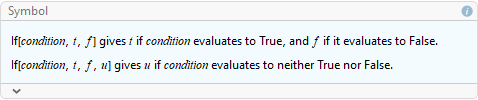

In [32]:
?If

A primeira linha diz-nos que podemos passar 3 argumentos à função `If`, em vez de só dois, para executarmos código caso a condição seja falsa:

In [33]:
If[5 > 10, Print["HEY!"], Print["It was false..."]]

It was false...


Claro que o segundo e terceiro argumentos da função `If` podem ser mais do que uma simples expressão. Em Mathematica, usa-se `;` para separar expressões consecutivas:

In [40]:
If[5 > 0,
    var = 3; other = 3^var; Print[other],
    var = 4; other = 4^var; Print[other]
]

27


In [35]:
If[5 > 10,
    var = 3; other = 3^var; Print[other],
    var = 4; other = 4^var; Print[other]
]

256


Porque no Mathematica tudo são funções, é importante notar que a sintaxe `;` é só um atalho para a função `CompoundExpression`, cujos argumentos são as expressões consecutivas:

expr  ; expr  ; … evaluates the expr  in turn, giving the last one as the result. 
    1       2                       i


Attributes[CompoundExpression]={HoldAll, Protected, ReadProtected}
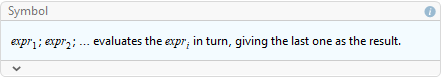

In [38]:
?CompoundExpression

Neste caso, vemos que a ajuda do Mathematica até usa a sintaxe `;` em vez da função explícita. Para efeitos de demonstração, podemos usar a função propriamente dita:

In [39]:
If[5 > 0,
    CompoundExpression[var = 3, other = 3^var, Print[other]],
    CompoundExpression[var = 4, other = 4^var, Print[other]]
]

27


```{admonition} TL;DR
O mais importante desta secção é
 - que execução condicional se faz com `If[condition, ifTrue, ifFalse]`;
 - instruções consecutivas são separadas por `;`.
```

## Ciclos

De modo semelhante, o Mathematica tem funções `For` e `While` para executar estes dois tipos de ciclos.

### Ciclo `For`

O ciclo `For` é tipicamente usado para algoritmos com algum tipo de interpretação linear, ou para os quais sabemos exatamente quantas iterações queremos fazer.

Compreender a ajuda do Mathematica é uma boa capacidade para se ter, portanto vamos interpretar esta mensagem de ajuda:

For[start, test, incr, body] executes start
 
>    , then repeatedly evaluates body and incr until test fails to give True. 


Attributes[For]={HoldAll, Protected}
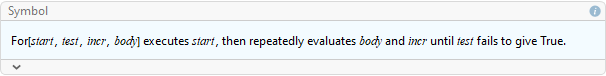

In [41]:
?For

Da mensagem em cima percebemos que o argumento `test` deve ser uma condição que é usada para verificar quando é que devemos parar o ciclo e também percebemos que o primeiro argumento `start` só é executado uma vez, no início, para inicializar variáveis. Tipicamente, o primeiro argumento é usado para inicializar as variáveis auxiliares do ciclo.

O último argumento é o "corpo" do ciclo (`body`), que há de ser o código que queremos executar repetidamente. O argumento `incr` é a expressão que é usada para indicar que está a ser feito progresso. Por exemplo, se quisermos imprimir os números inteiros de $1$ a $5$ inclusive, teríamos o seguinte:

 - `start` seria `i = 1` para inicializar a variável auxiliar que vai "contar" até $5$;
 - `test` seria `i <= 5` porque queremos imprimir os números enquanto ainda estivermos a contar números menores ou iguais a $5$;
 - `incr` seria `i = i + 1` porque, depois de imprimirmos um número, queremos "contar" o próximo número;
 - `body` seria `Print[i]` porque essa é a expressão principal que queremos executar em cada iteração.

Tudo junto, teria este aspeto:

In [83]:
For[i = 1, i <= 5, i = i + 1,
    Print[i]
]

1
2
3
4
5


Note-se que o terceiro argumento da função `For`, que é a expressão que deve incrementar a variável do ciclo, usa geralmente uma notação abreviada para alterar o valor da variável.

Essa sintaxe pretende abreviar o padrão `var = var f value` para `var f= value`.

Assim, incrementar uma variável uma unidade deixa de ser `var = var + 1` e passa a ser `var += 1`:

In [84]:
var = 3;
var += 1;
Print[var];

4


Claro que `f` não tem de ser a adição e o valor a ser usado não precisa de ser `1`:

In [87]:
var = 3;
var += 2;
Print[var];

5


In [90]:
var -= 5;
Print[var];

0


Os casos `var += 1` e `var -= 1` têm ainda dois casos especiais, nomeadamente `++var`, `var++`, `--var` e `var--`. A diferença reside na ordem em que as coisas acontecem.

`var++` primeiro devolve o valor de `var` e depois incrementa a variável, ao passo que `++var` primeiro incrementa o valor da variável e só depois é que o devolve:

In [75]:
var = 0;
Print[var];
Print[var++];
Print[var];

0
0
1


In [79]:
var = 0;
Print[var];
Print[++var];
Print[var];

0
1
1


`var--` e `--var` funcionam de modo semelhante.

```{admonition} TL;DR
O mais importante desta subsecção é
 - a sintaxe `variable f= value` para alterar o valor de `variable` de forma mais sucinta;
 - a função `For[initialisation, stoppingTest, increment, loopBody]` para execução repetida de um conjunto de instruções.
```

### Ciclo `While`

De modo semelhante, existe uma função `While` que permite a execução repetida de um conjunto de instruções até que um certo teste seja falso:

While[test, body] evaluates test, then body
 
>     , repetitively, until test first fails to give True. 


Attributes[While]={HoldAll, Protected}
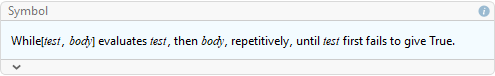

In [92]:
?While

In [93]:
i = 1;
While[i <= 5,
    Print[i];
    i = i + 1;
]

1
2
3
4
5


O exemplo em cima é equivalente à utilização do ciclo `For` da subsecção anterior e é, em particular, um exemplo relativamente mau de uma utilização útil do ciclo `While`. O acto de "contar" de $1$ até $5$ é algo linear, que acontece de forma regular, e é por isso um excelente algoritmo para ser implementado com um ciclo `For`.

Em geral, o ciclo `While` usa-se em algoritmos em que é mais difícil prever, *a priori*, o número de iterações que vão ser necessárias para completar o algoritmo. Por exemplo, quando calculamos os valores sucessivos que um número toma na sequência de Collatz:

:::{tip}
A "Conjetura de Collatz" diz que qualquer número inteiro positivo $n$ eventualmente chega a $1$, se seguirmos a sequência $n_0 = n$,

$$
n_{i + 1} = \begin{cases}
    \frac{n_i}{2}, \text{ if $2$ divides $n$ } \\
    3n_i + 1, \text{ otherwise }
\end{cases} ~ .
$$
:::

In [99]:
n = 10;
While[n > 1,
    If[Mod[n, 2] == 0,
        n = n/2,
        n = 3n + 1
    ];
    Print[n]
]

5
16
8
4
2
1


```{admonition} TL;DR
O mais importante desta subsecção é
 - a sintaxe da função `While` que permite a execução repetida de um conjunto de instruções.
```

## A praga das variáveis temporárias

Em Mathematica, todas as variáveis que criamos são criadas de forma global. Isto significa que todas as pequenas variáveis que usarmos para cálculos auxiliares ou resultados temporários ficam disponíveis na nossa sessão. Isto pode parecer bom, mas rapidamente a quantidade enorme de variáveis que estão disponíveis vai interferir com o nosso código. Isto pode acontecer por uma de variadíssimas razões, por exemplo porque estamos a tentar fazer cálculos simbólicos mas estamos a usar variáveis que estão definidas ou uma variável é usada inadvertidamente num sítio que não deve, e portanto o seu valor está diferente do que deveria ser.

Para evitar isto, o Mathematica possui a função `Module`. A função `Module` recebe dois argumentos:

Module[{x, y, …}, expr] specifies that occurrences of the symbols x
 
>    , y, … in expr should be treated as local. Module[{x = x , …}, expr]
                                                             0
 
>        defines initial values for x, …. 


Attributes[Module]={HoldAll, Protected}
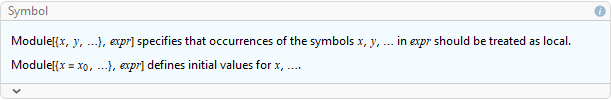

In [101]:
?Module

Podemos ver que o primeiro argumento da função é uma lista de nomes de variáveis (possivelmente com valores iniciais) e podemos ver que o segundo argumento será o código que queremos escrever.

Por exemplo, em cima escrevemos um ciclo `For` que usava a variável auxiliar `i`, que ainda existe e tem um valor:

In [103]:
i

6

Mas esta variável é completamente inútil, na medida em que o seu único propósito era como variável auxiliar no ciclo. Podemos apagá-la com a função `Clear`:

In [104]:
Clear[i]

E agora podemos escrever o mesmo ciclo, mas dentro da função `Module`, para que a variável auxiliar não se torne global:

In [105]:
Module[{i},
    For[i = 1, i <= 3, i++,
        Print[i]
    ]
]

1
2
3


Agora podemos ver que a variável `i` não tem qualquer valor:

In [109]:
i

i

Numa linguagem de programação típica isto seria um erro qualquer, por exemplo um `Name Error` em Python, porque `i` não diz respeito a nenhuma variável definida, mas em Mathematica obtemos o nome da variável como resposta, porque Mathematica é um software de cálculo simbólico.

:::{admonition} TL;DR
O mais importante desta subsecção é
 - o facto de que é má ideia deixar todas as variáveis tornarem-se globais;
 - podemos manter variáveis como locais com a função `Module`.
:::